# Created Usernames

In [115]:
usernames = []


for i in list(range(200)):
  userName = "user" + str(i)
  usernames.append(userName)

print(usernames)

['user0', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7', 'user8', 'user9', 'user10', 'user11', 'user12', 'user13', 'user14', 'user15', 'user16', 'user17', 'user18', 'user19', 'user20', 'user21', 'user22', 'user23', 'user24', 'user25', 'user26', 'user27', 'user28', 'user29', 'user30', 'user31', 'user32', 'user33', 'user34', 'user35', 'user36', 'user37', 'user38', 'user39', 'user40', 'user41', 'user42', 'user43', 'user44', 'user45', 'user46', 'user47', 'user48', 'user49', 'user50', 'user51', 'user52', 'user53', 'user54', 'user55', 'user56', 'user57', 'user58', 'user59', 'user60', 'user61', 'user62', 'user63', 'user64', 'user65', 'user66', 'user67', 'user68', 'user69', 'user70', 'user71', 'user72', 'user73', 'user74', 'user75', 'user76', 'user77', 'user78', 'user79', 'user80', 'user81', 'user82', 'user83', 'user84', 'user85', 'user86', 'user87', 'user88', 'user89', 'user90', 'user91', 'user92', 'user93', 'user94', 'user95', 'user96', 'user97', 'user98', 'user99', 'user100'

# Turning the user list into dataframe

In [116]:
import pandas as pd
import random
from pandas.io import gbq
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt


In [117]:
userData = pd.DataFrame(usernames, columns=['userID'])
userData.head()


,userID
0,user0
1,user1
2,user2
3,user3
4,user4


In [118]:
products = pd.read_csv('product_descriptions.csv')
products2 = pd.read_csv('product_descriptions.csv')
products.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [119]:
productListForUser = []

for i in list(range(200)):
  samples = products['product_description'].sample(5)
  productListForUser.append(list(samples))


In [120]:
products = pd.DataFrame(productListForUser, columns = ['product1', 'product2', 'product3', 'product4', 'product5'])
products.head(5)

,product1,product2,product3,product4,product5
0,This patio door roller assembly features a sta...,Handy set combines a useful selection of titan...,When looking for that perfect solution for you...,"These sheet metal screws, or tapping screws, a...",Cross Sawn Oak Warm Brown Base attaches to the...
1,Speakman traditional series round bowl eyewash...,Use the Jiffy Windowsill Greenhouse 24 to crea...,Active Ventilation Products' Aura PVC Vent Cap...,The Elizabethan Classics 1-1/2 in. Brass Leg T...,"The Original, Made in North America, do-it-you..."
2,We dressed up vintage principles with this sop...,"The Solstice security door, a member of the Un...",Transform an ordinary kitchen or bathroom into...,"For a classic, cultivated look on your homes e...",The cornerstone of the Elementary Collection i...
3,The Catskill Craftsmen 15-1/4 in. Kitchen Work...,The San Tropez Bidet offers versatile styling ...,"When safety is a priority, use Klein Tools' Wi...",TSW (Toe Space) is a surface mount grille that...,Protect your vehicle's flooring and your cargo...
4,Wire residential indoor branch circuits for ou...,The Cooper Wiring Devices CSB315STV-SP Commerc...,WeatherShield brand pressure treated products ...,You'll love how the curved edges of this beaut...,This large half moon table will add a lot of d...


In [121]:
list1 = [userData, products]

df_col_merged = pd.concat(list1, axis=1)
df_col_merged.head()

,userID,product1,product2,product3,product4,product5
0,user0,This patio door roller assembly features a sta...,Handy set combines a useful selection of titan...,When looking for that perfect solution for you...,"These sheet metal screws, or tapping screws, a...",Cross Sawn Oak Warm Brown Base attaches to the...
1,user1,Speakman traditional series round bowl eyewash...,Use the Jiffy Windowsill Greenhouse 24 to crea...,Active Ventilation Products' Aura PVC Vent Cap...,The Elizabethan Classics 1-1/2 in. Brass Leg T...,"The Original, Made in North America, do-it-you..."
2,user2,We dressed up vintage principles with this sop...,"The Solstice security door, a member of the Un...",Transform an ordinary kitchen or bathroom into...,"For a classic, cultivated look on your homes e...",The cornerstone of the Elementary Collection i...
3,user3,The Catskill Craftsmen 15-1/4 in. Kitchen Work...,The San Tropez Bidet offers versatile styling ...,"When safety is a priority, use Klein Tools' Wi...",TSW (Toe Space) is a surface mount grille that...,Protect your vehicle's flooring and your cargo...
4,user4,Wire residential indoor branch circuits for ou...,The Cooper Wiring Devices CSB315STV-SP Commerc...,WeatherShield brand pressure treated products ...,You'll love how the curved edges of this beaut...,This large half moon table will add a lot of d...


# Store the products and users into Database Table

In [ ]:
df_col_merged.to_gbq(destination_table='userFakeData.data1', project_id='eshopserver', if_exists='replace')

# Building The Model 

In [123]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(products2["product_description"][0:1000])
X1

<1000x13688 sparse matrix of type '<class 'numpy.float64'>'
	with 70783 stored elements in Compressed Sparse Row format>

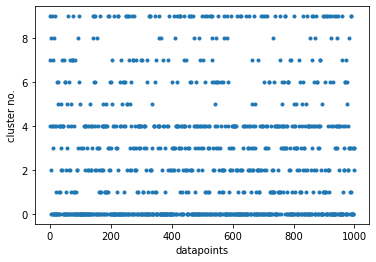

In [145]:
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.xlabel('datapoints')
plt.ylabel('cluster no.')
plt.show()

In [146]:
def print_cluster(i):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind]),
    print

In [147]:
def return_cluster(i):
    list1 = []
    for ind in order_centroids[i, :10]:
        # print (' %s' % terms[ind]), print
        list1.append(terms[ind])

    return list1

# Creating Groups using the Model

In [149]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 ft
 landscape
 stone
 used
 stake
 product
 concrete
 vary
 mulch
 edging
Cluster 1:
 air
 fan
 control
 cooling
 ft
 heat
 room
 000
 snow
 installation
Cluster 2:
 patio
 frame
 weather
 door
 steel
 resistant
 resin
 outdoor
 chairs
 fabric
Cluster 3:
 water
 toilet
 installation
 tile
 heater
 tank
 flush
 bowl
 design
 piece
Cluster 4:
 cooking
 cu
 oven
 cycle
 wash
 washer
 options
 cycles
 energy
 ft
Cluster 5:
 light
 watt
 led
 fixture
 lighting
 bulbs
 bulb
 fluorescent
 energy
 leds
Cluster 6:
 shelves
 storage
 wall
 finish
 cabinet
 shelf
 nickel
 design
 room
 door
Cluster 7:
 power
 cutting
 volt
 drill
 tool
 saw
 speed
 battery
 blade
 lithium
Cluster 8:
 wood
 ft
 steel
 use
 proposition
 easy
 california
 post
 nbsp
 residents
Cluster 9:
 window
 roller
 cover
 easy
 grill
 windows
 film
 frame
 vinyl
 size


# Predict Products to recommend based on the product the customer purchased

In [150]:
def show_recommendations2(product):
    Y = vectorizer.transform([product]) #put it in numbers
    prediction = model.predict(Y) #using those numbers, we find the nearby cluster
    return (return_cluster(prediction[0])) 

In [151]:
show_recommendations2('Shower cap')

['shelves',
 'storage',
 'wall',
 'finish',
 'cabinet',
 'shelf',
 'nickel',
 'design',
 'room',
 'door']

In [152]:
maindflist = df_col_merged[['product1', 'product2', 'product3', 'product4', 'product5']].values.tolist()

# Predict Products to recommend based on all the products the customer purchased

In [156]:
recommendedProductsForEachUser = []

for i in maindflist:
  allProductsForUser = []
  for j in i:
    tenProducts = list(show_recommendations2(j))
    count1 = 0
    for k in tenProducts:
      allProductsForUser.append(k)
      count1 = count1 + 1
      if count1 == 8:
        break

  random.shuffle(allProductsForUser)
  allProductsForUser = set(allProductsForUser)
  allProductsForUser = list(allProductsForUser)
  recommendedProductsForEachUser.append(allProductsForUser[0:7])
productRecommendations = pd.DataFrame(recommendedProductsForEachUser, columns = ['product1', 'product2', 'product3', 'product4', 'product5', 'product6', 'product7'])

productRecommendations.head()

# ok so for each product and for each row
  # I need to recommend product
    # then I need to find recommended products of the product
    # I have to pick 2 reccomended products and store it in the list
  # Then after I get the list for the user
  # I will have to make sure the products don't repeat 
  # then I put it in list of lists 


,product1,product2,product3,product4,product5,product6,product7
0,frame,door,concrete,storage,landscape,product,shelf
1,concrete,landscape,california,product,proposition,volt,speed
2,frame,door,concrete,storage,landscape,california,product
3,storage,concrete,landscape,california,product,shelf,proposition
4,concrete,landscape,california,product,proposition,volt,speed


In [157]:
usernames
list1 = [userData, productRecommendations]

df_col_merged = pd.concat(list1, axis=1)

In [158]:
df_col_merged

,userID,product1,product2,product3,product4,product5,product6,product7
0,user0,frame,door,concrete,storage,landscape,product,shelf
1,user1,concrete,landscape,california,product,proposition,volt,speed
2,user2,frame,door,concrete,storage,landscape,california,product
3,user3,storage,concrete,landscape,california,product,shelf,proposition
4,user4,concrete,landscape,california,product,proposition,volt,speed
...,...,...,...,...,...,...,...,...
195,user195,concrete,landscape,california,product,proposition,volt,speed
196,user196,concrete,landscape,california,product,proposition,volt,speed
197,user197,frame,door,california,proposition,volt,patio,speed
198,user198,concrete,landscape,california,bulb,product,proposition,volt
